# Loan Application Status Prediction 

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV ,train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
LoanApp=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
LoanApp

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This dataset contains 614 rows and 13 columns

In [6]:
LoanApp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
LoanApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
LoanApp.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 8 categorical and 5 numerical datatypes present in the dataset

In [9]:
LoanApp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
LoanApp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The column "Gender","Married","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History" has some missing  values.

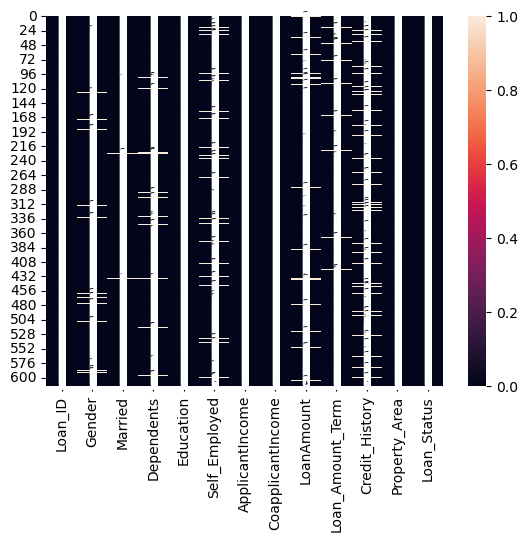

In [11]:
sns.heatmap(LoanApp.isnull(),annot=True)
plt.show()

Filling Missing Values

In [12]:
columns=['Gender','Married','Self_Employed','Dependents','Credit_History','Loan_Amount_Term']

In [13]:
for col in columns:
    LoanApp[col].fillna(LoanApp[col].mode()[0],inplace=True)

In [14]:
LoanApp.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Filling LoanAmount with Mean

In [15]:
LoanApp['LoanAmount'].fillna(LoanApp['LoanAmount'].mean(), inplace=True)

In [16]:
LoanApp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now No missing values are present in the dataset

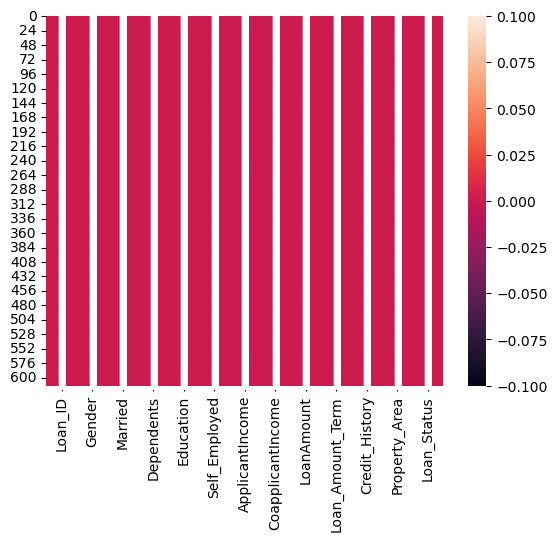

In [17]:
sns.heatmap(LoanApp.isnull(),annot=True)
plt.show()

In [18]:
LoanApp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Right Skewness present in the column ApplicantIncome,CoapplicantIncome,LoanAmount. Left Skewness present in columns Loan_Amount_Term,Credit_History

Exploratory Data Analysis

Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

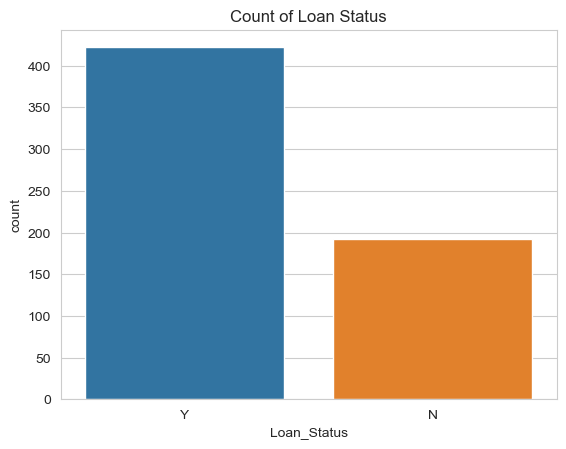

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',data=LoanApp)
plt.title('Count of Loan Status')
plt.show

In [20]:
LoanApp['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

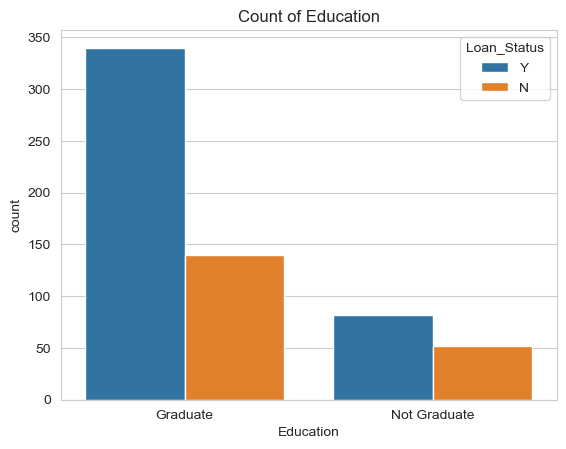

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Education',hue="Loan_Status",data=LoanApp)
plt.title('Count of Education')
plt.show

"Graduate" has the highest count and loan approved is high when compared to "Not Graduate"

In [22]:
LoanApp['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

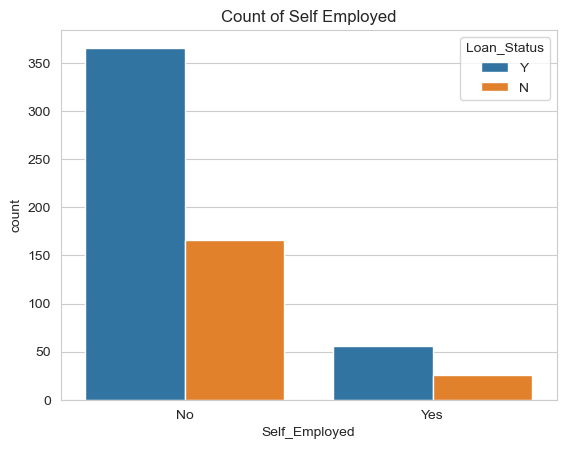

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Employed',hue="Loan_Status",data=LoanApp)
plt.title('Count of Self Employed')
plt.show

In [24]:
LoanApp['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

The self employed count is less when compared to not self employed and also loan approved is high for Not Self employed

<function matplotlib.pyplot.show(close=None, block=None)>

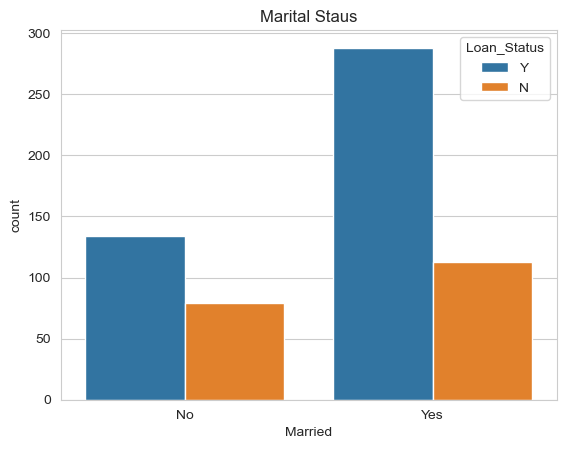

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Married',hue="Loan_Status",data=LoanApp)
plt.title('Marital Staus')
plt.show

In [26]:
LoanApp['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

The count of married people is high when compared to unmarried. Also loan approved is high for married people.

<function matplotlib.pyplot.show(close=None, block=None)>

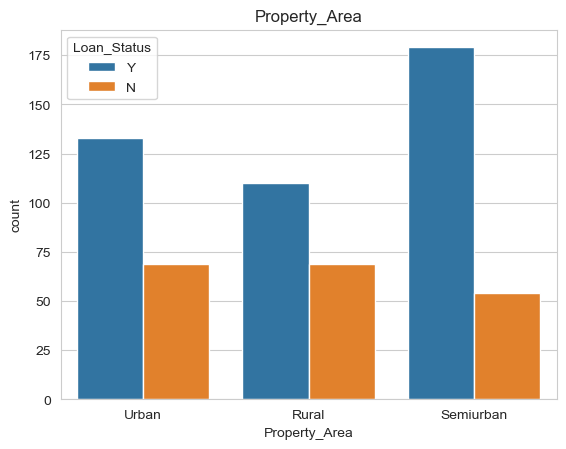

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Property_Area',hue="Loan_Status",data=LoanApp)
plt.title('Property_Area')
plt.show

In [28]:
LoanApp['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Loan Approved is high for Semiurban areas

<function matplotlib.pyplot.show(close=None, block=None)>

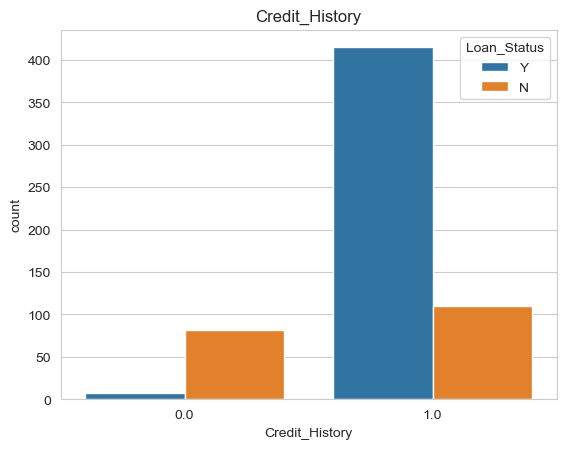

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Credit_History',hue="Loan_Status",data=LoanApp)
plt.title('Credit_History')
plt.show

In [30]:
LoanApp['Credit_History'].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

The loan is approved when the credit history is 1.0 otherwise it gets rejected

<function matplotlib.pyplot.show(close=None, block=None)>

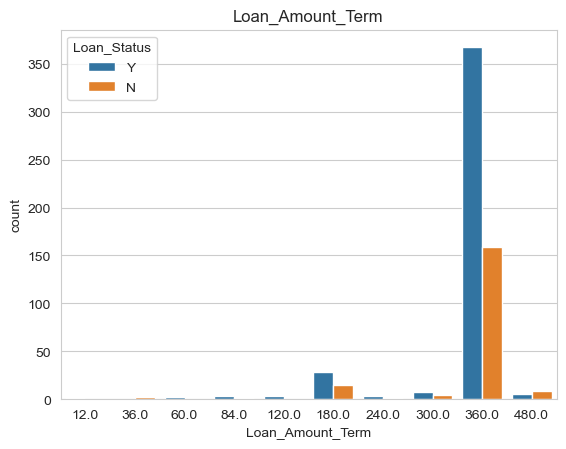

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Amount_Term',hue="Loan_Status",data=LoanApp)
plt.title('Loan_Amount_Term')
plt.show

The loan amount term "360.0" has the highest count and this is the loan amount approved.

In [32]:
LoanApp['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

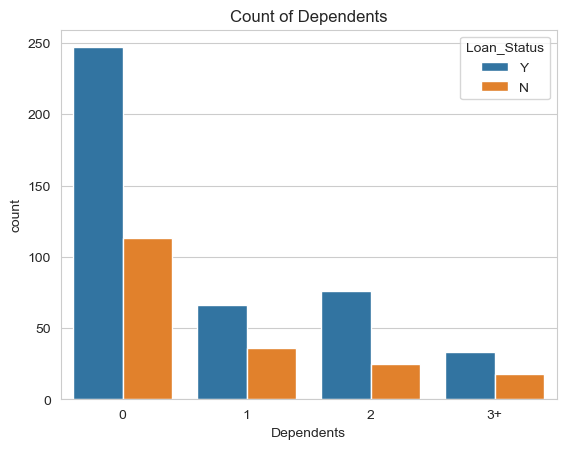

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Dependents',hue="Loan_Status",data=LoanApp)
plt.title('Count of Dependents')
plt.show

The Dependents "0" has the highest count and the loan approved for them is high

In [34]:
LoanApp['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

BiVariate Analysis

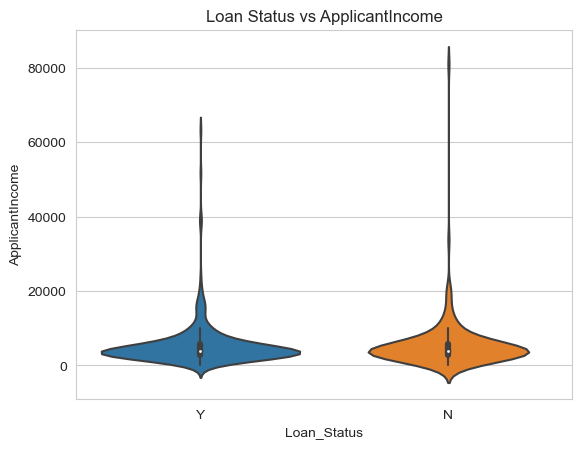

In [35]:

sns.violinplot(x='Loan_Status',y='ApplicantIncome',data=LoanApp)
plt.title('Loan Status vs ApplicantIncome')
plt.show()

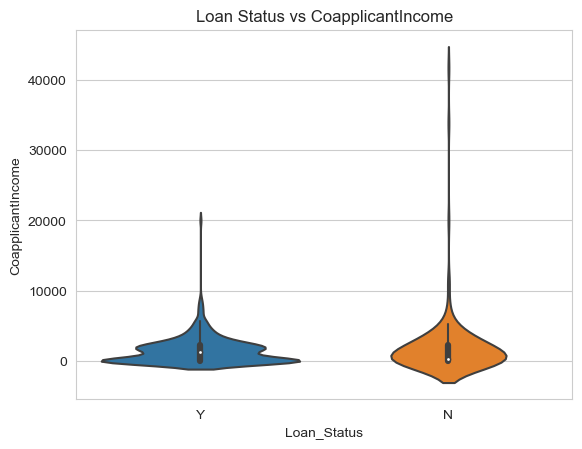

In [36]:

sns.violinplot(x='Loan_Status',y='CoapplicantIncome',data=LoanApp)
plt.title('Loan Status vs CoapplicantIncome')
plt.show()

Distribution of data

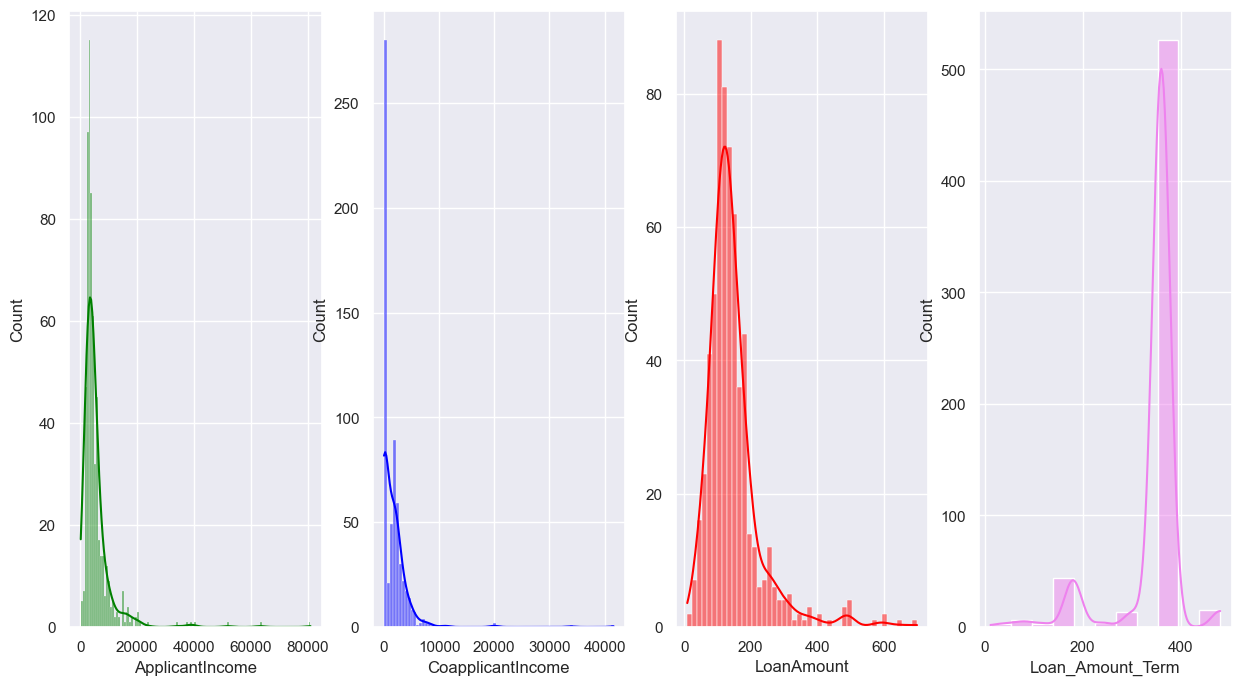

In [37]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(15, 8))
plt.subplot(1,4,1)
sns.histplot(data = LoanApp, x = "ApplicantIncome", kde = True, color = 'green')
plt.subplot(1,4,2)
sns.histplot(data = LoanApp, x = "CoapplicantIncome", kde = True, color = 'blue')
plt.subplot(1,4,3)
sns.histplot(data = LoanApp, x = "LoanAmount", kde = True, color = 'red');
plt.subplot(1,4,4,)
sns.histplot(data = LoanApp, x = "Loan_Amount_Term", kde = True, color = 'violet');

The distribution of ApplicantIncome, CoApplicantIncome, and LoanAmount are positively skewed and contains outliers.

The distribution of Loan_Amount Term is negatively skewed and contain outliers as well.

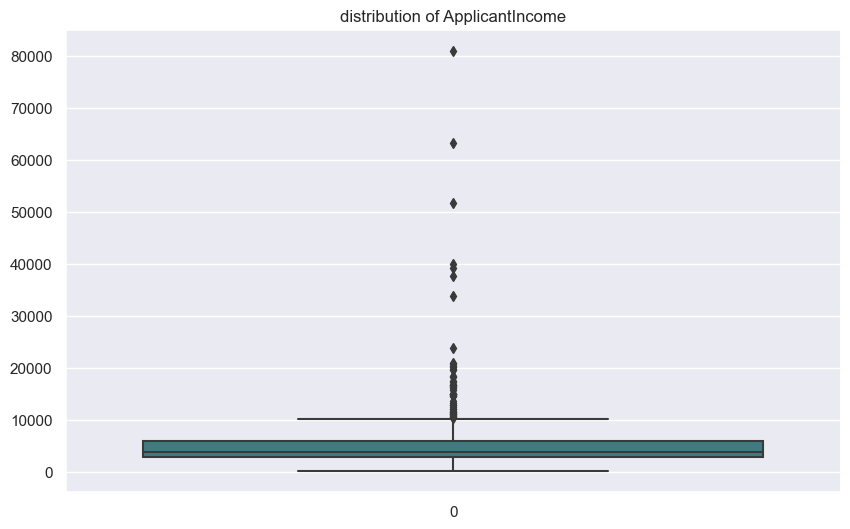

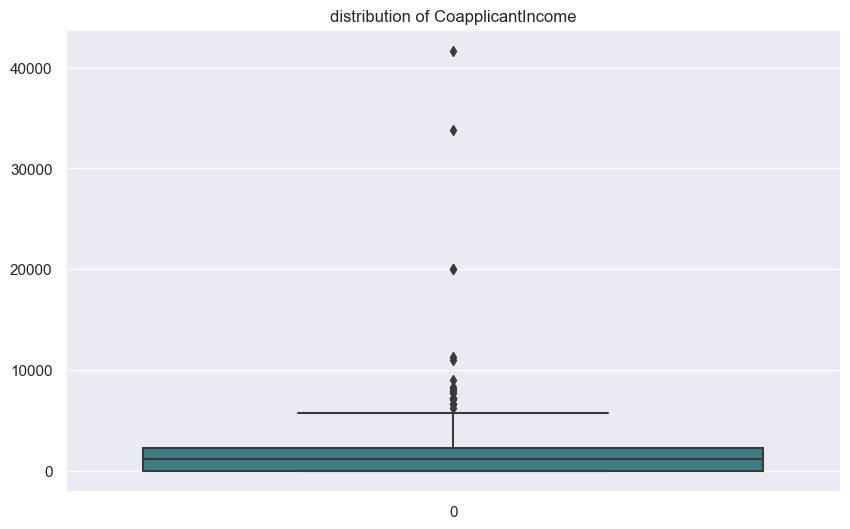

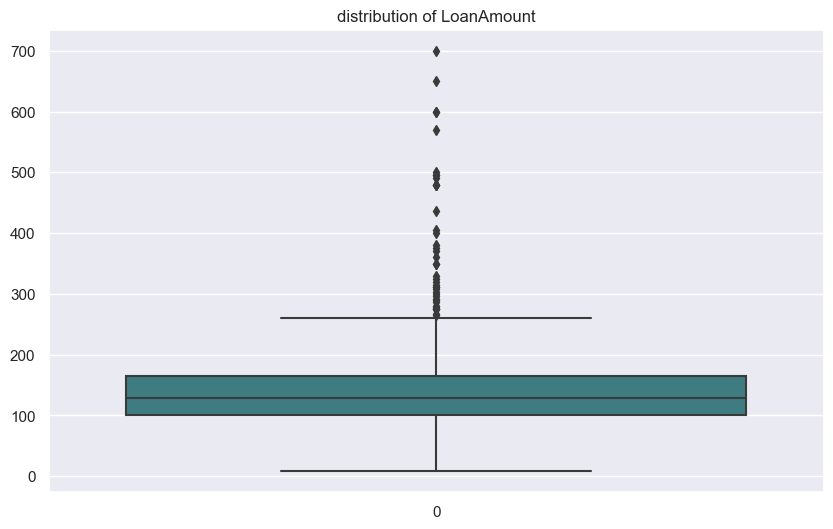

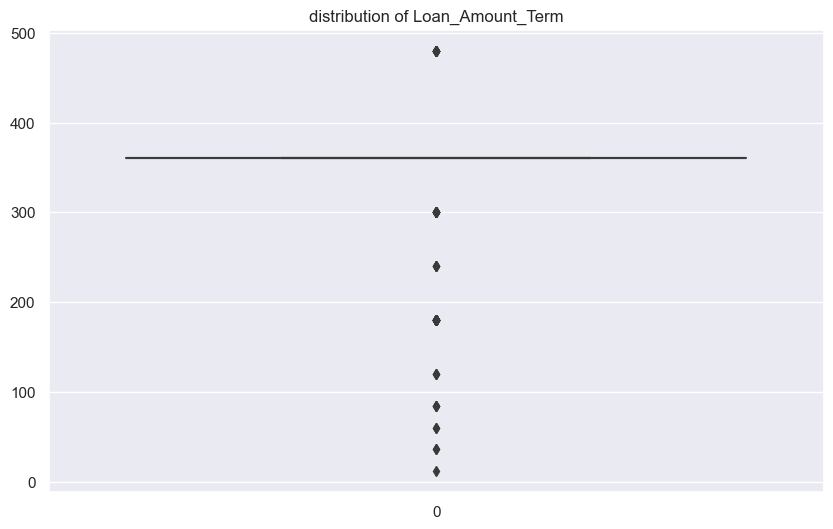

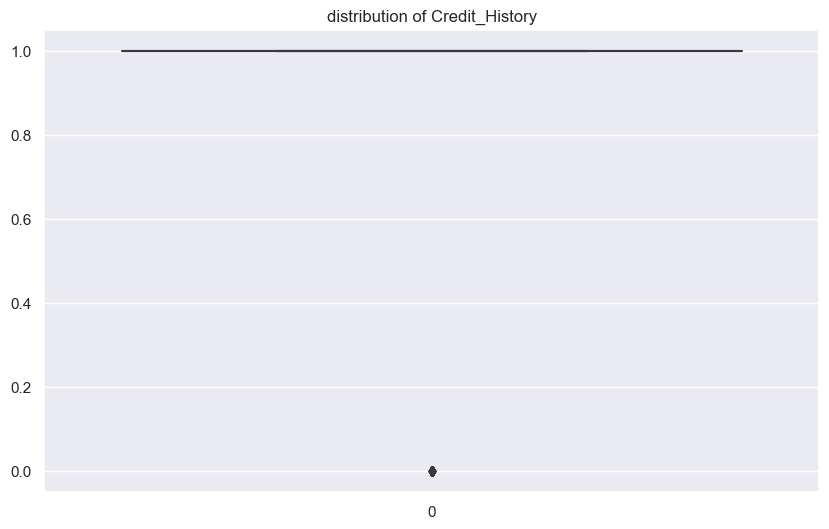

In [38]:
for i in LoanApp.columns:
    if LoanApp[i].dtype !="object":
        plt.figure(figsize=(10,6))
        sns.boxplot(LoanApp[i],palette='crest')
        plt.title(f"distribution of {i}")

Outliers are present in the ApplicantIncome,CoapplicantIncome,LoanAmount

## Converting Categorical Data into Numerical Data

In [39]:
for i in LoanApp.columns:
    if LoanApp[i].dtype =="object":
        le=LabelEncoder()
        LoanApp[i]=le.fit_transform(LoanApp[i])

In [40]:
LoanAppCorr=LoanApp.corr()
LoanAppCorr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549


<Axes: >

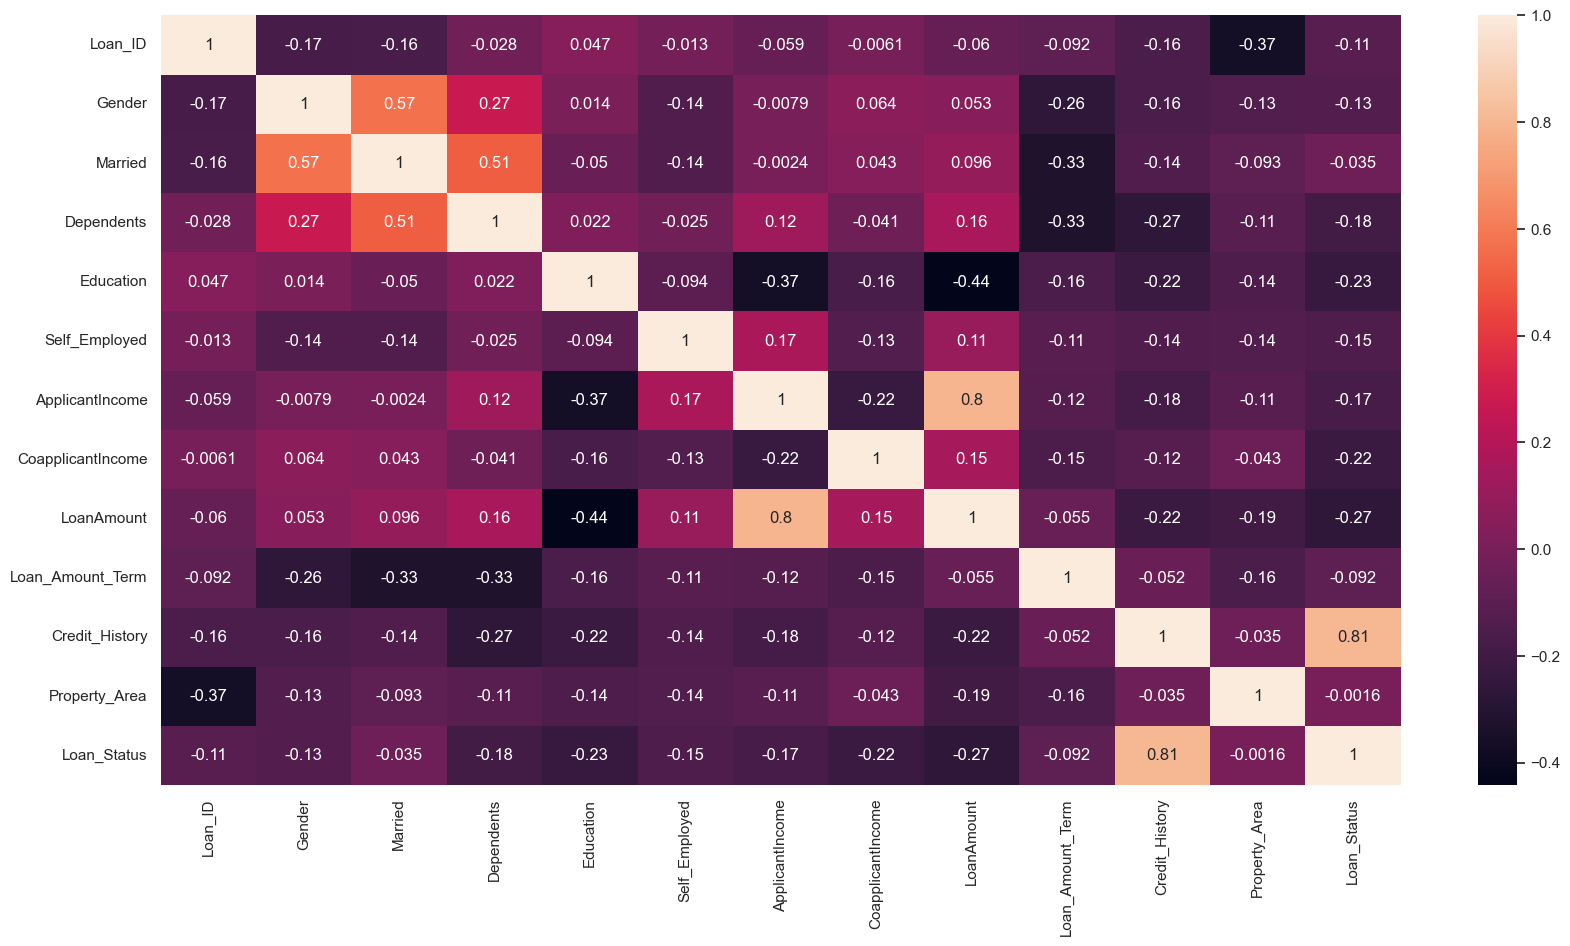

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(LoanAppCorr.corr(),annot=True)

Loan Status is highly correlated with Credit history and viceversa.Loan Amount is highly correlated with ApplicantIncome and viceversa

Loan_ID                 Axes(0.125,0.653529;0.133621x0.226471)
Gender               Axes(0.285345,0.653529;0.133621x0.226471)
Married               Axes(0.44569,0.653529;0.133621x0.226471)
Dependents           Axes(0.606034,0.653529;0.133621x0.226471)
Education            Axes(0.766379,0.653529;0.133621x0.226471)
Self_Employed           Axes(0.125,0.381765;0.133621x0.226471)
ApplicantIncome      Axes(0.285345,0.381765;0.133621x0.226471)
CoapplicantIncome     Axes(0.44569,0.381765;0.133621x0.226471)
LoanAmount           Axes(0.606034,0.381765;0.133621x0.226471)
Loan_Amount_Term     Axes(0.766379,0.381765;0.133621x0.226471)
Credit_History              Axes(0.125,0.11;0.133621x0.226471)
Property_Area            Axes(0.285345,0.11;0.133621x0.226471)
Loan_Status               Axes(0.44569,0.11;0.133621x0.226471)
dtype: object

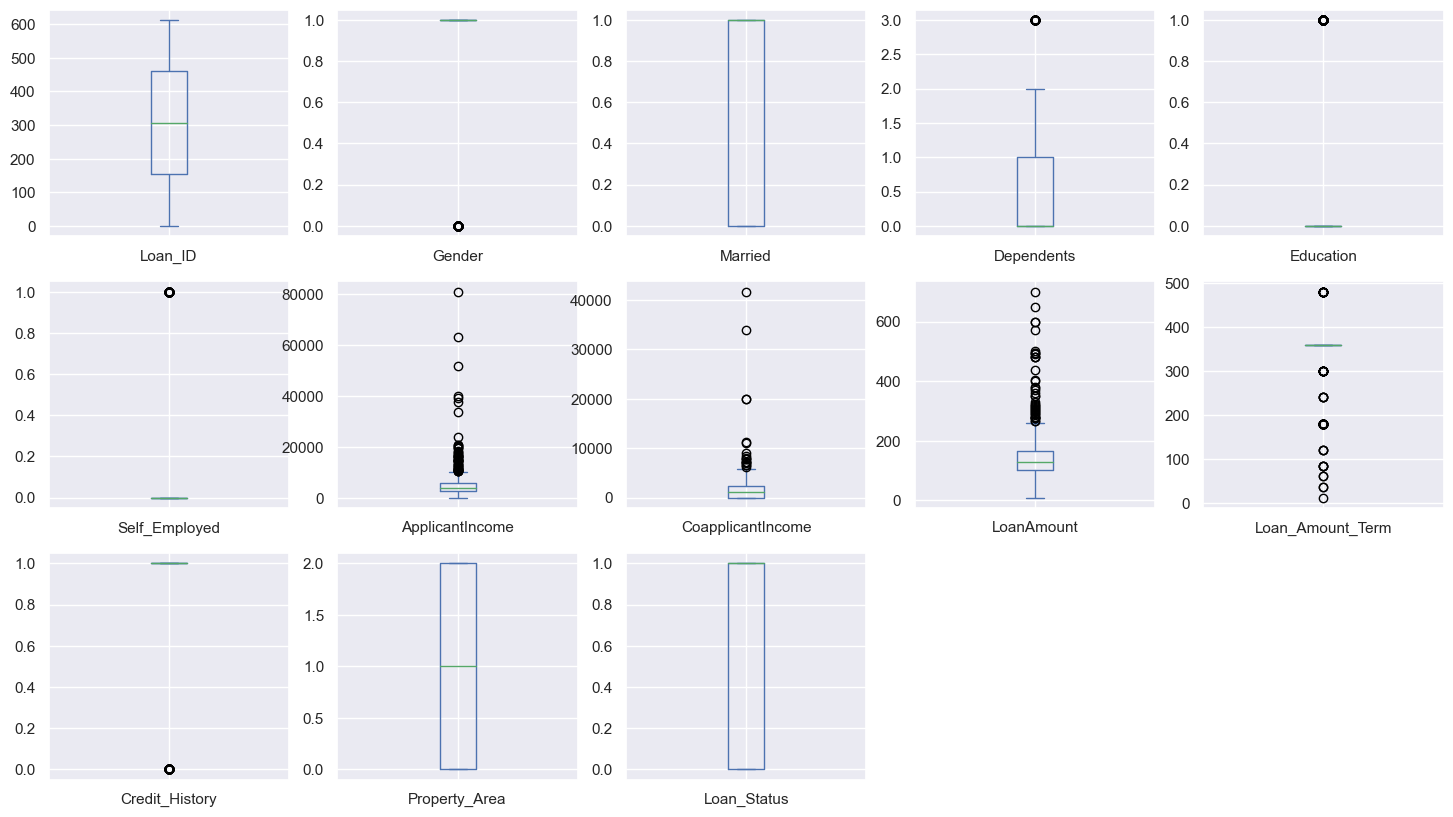

In [42]:
LoanApp.plot(kind='box',subplots=True,layout=(3,5),figsize=(18,10))

As mentioned above Outliers are present in the ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm

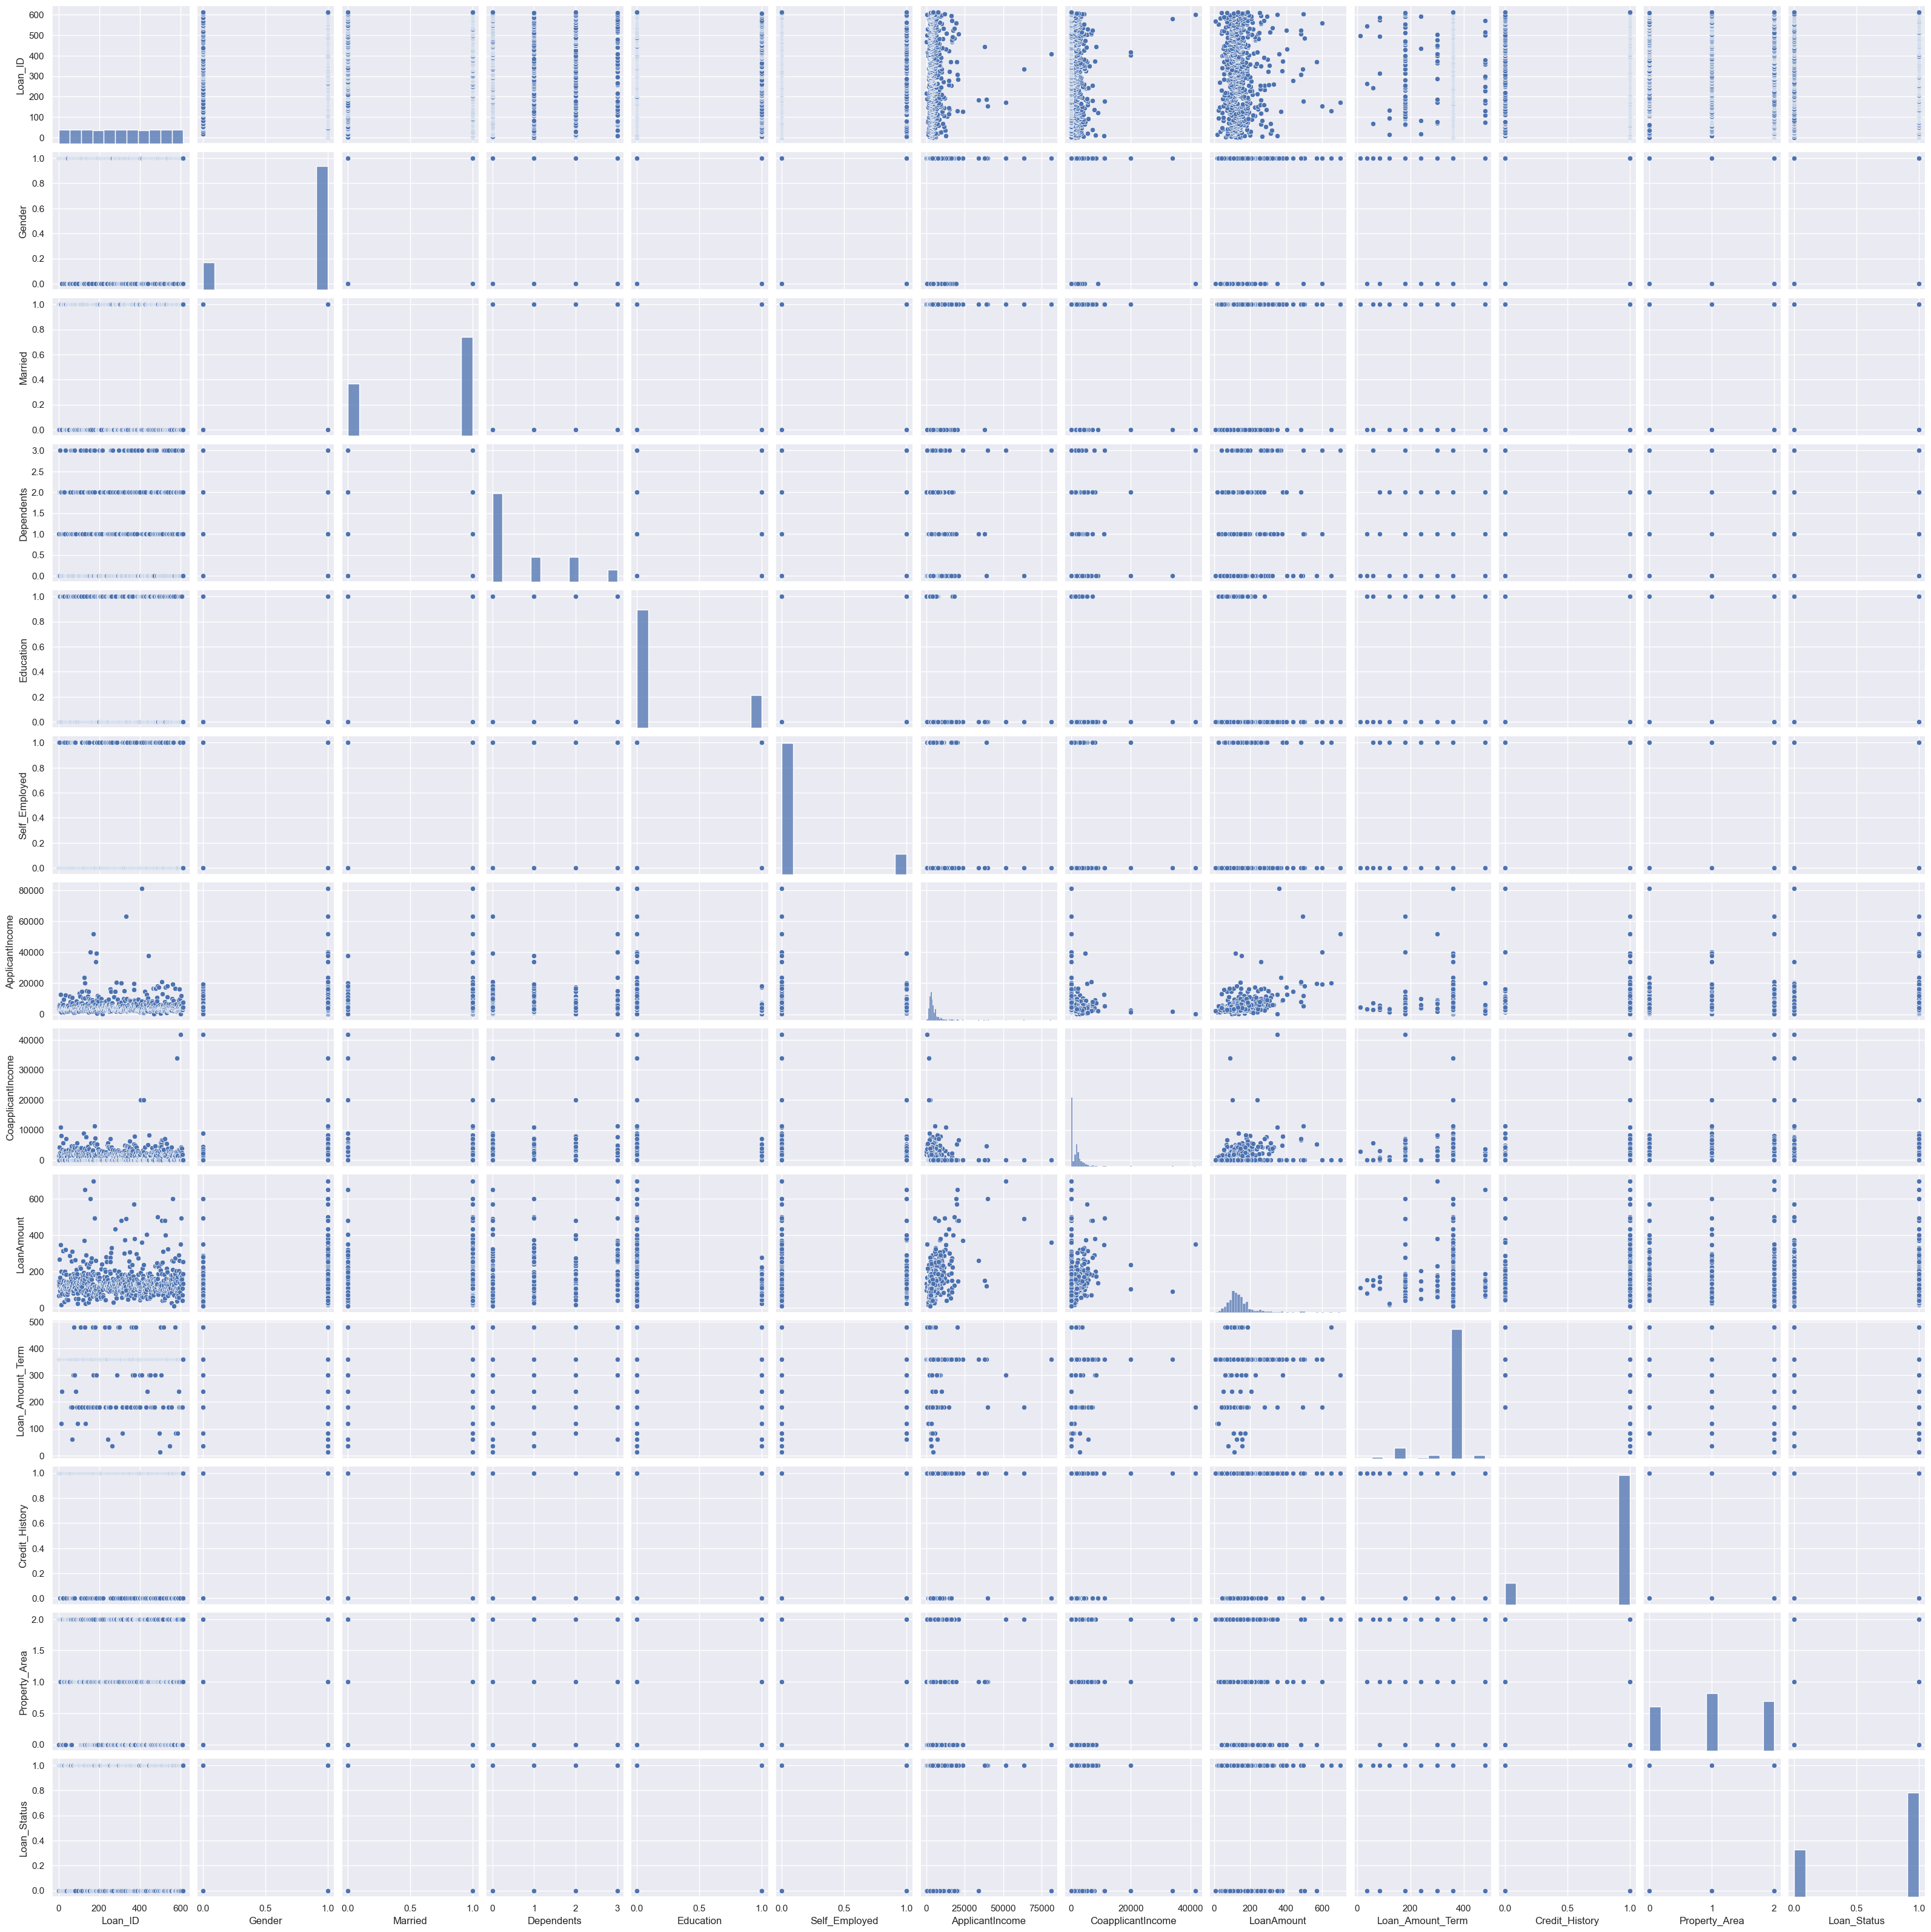

In [43]:
sns.pairplot(LoanApp)
plt.show()

Skewness of Data

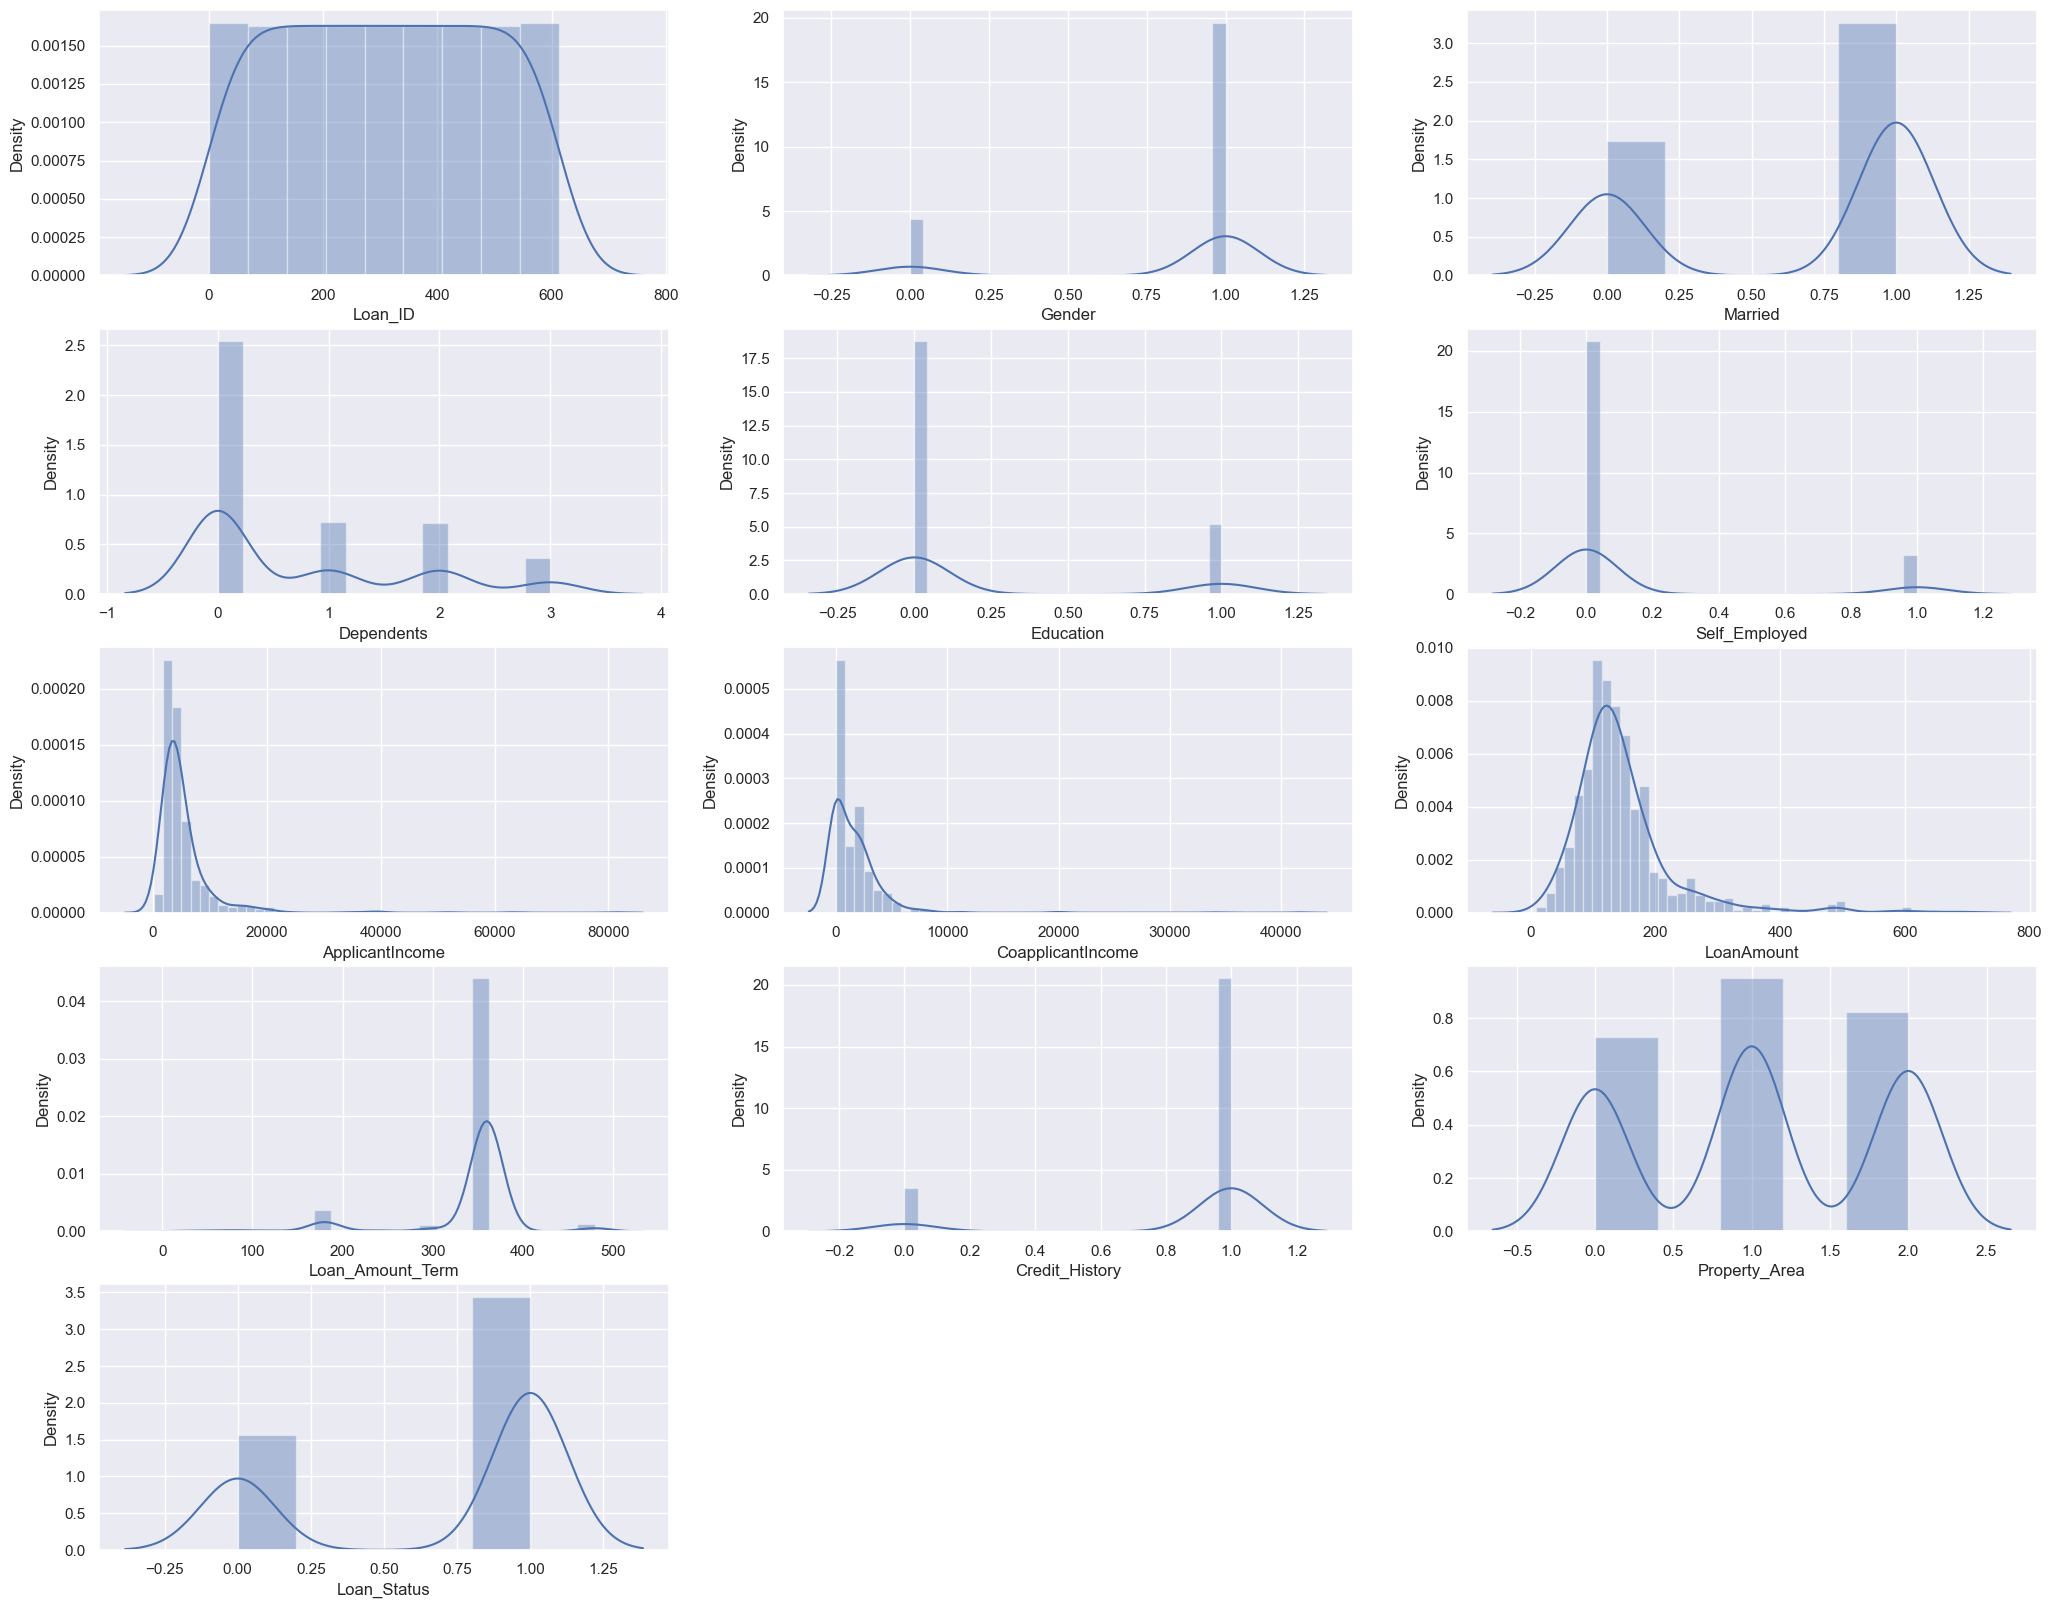

In [44]:
plt.figure(figsize=(25,20))
for i in enumerate(LoanApp.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(LoanApp[i[1]],color='b')

Skewness present in the Loan_Amount_Term,Loan Amount ,ApplicantIncome,CoApplicantIncome

In [45]:
LoanApp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Removing Outliers

In [46]:
from scipy.stats import zscore
z = np.abs(zscore(LoanApp))
threshold = 3
LoanApp_new = LoanApp[(z<3).all(axis = 1)]
LoanApp_new.shape

(577, 13)

##### Treating Skewness

In [47]:
LoanApp_new.ApplicantIncome = np.sqrt(LoanApp_new.ApplicantIncome)
LoanApp_new.CoapplicantIncome = np.sqrt(LoanApp_new.CoapplicantIncome)
LoanApp_new.Loan_Amount_Term = np.sqrt(LoanApp_new.Loan_Amount_Term)
LoanApp_new.LoanAmount = np.sqrt(LoanApp_new.LoanAmount)

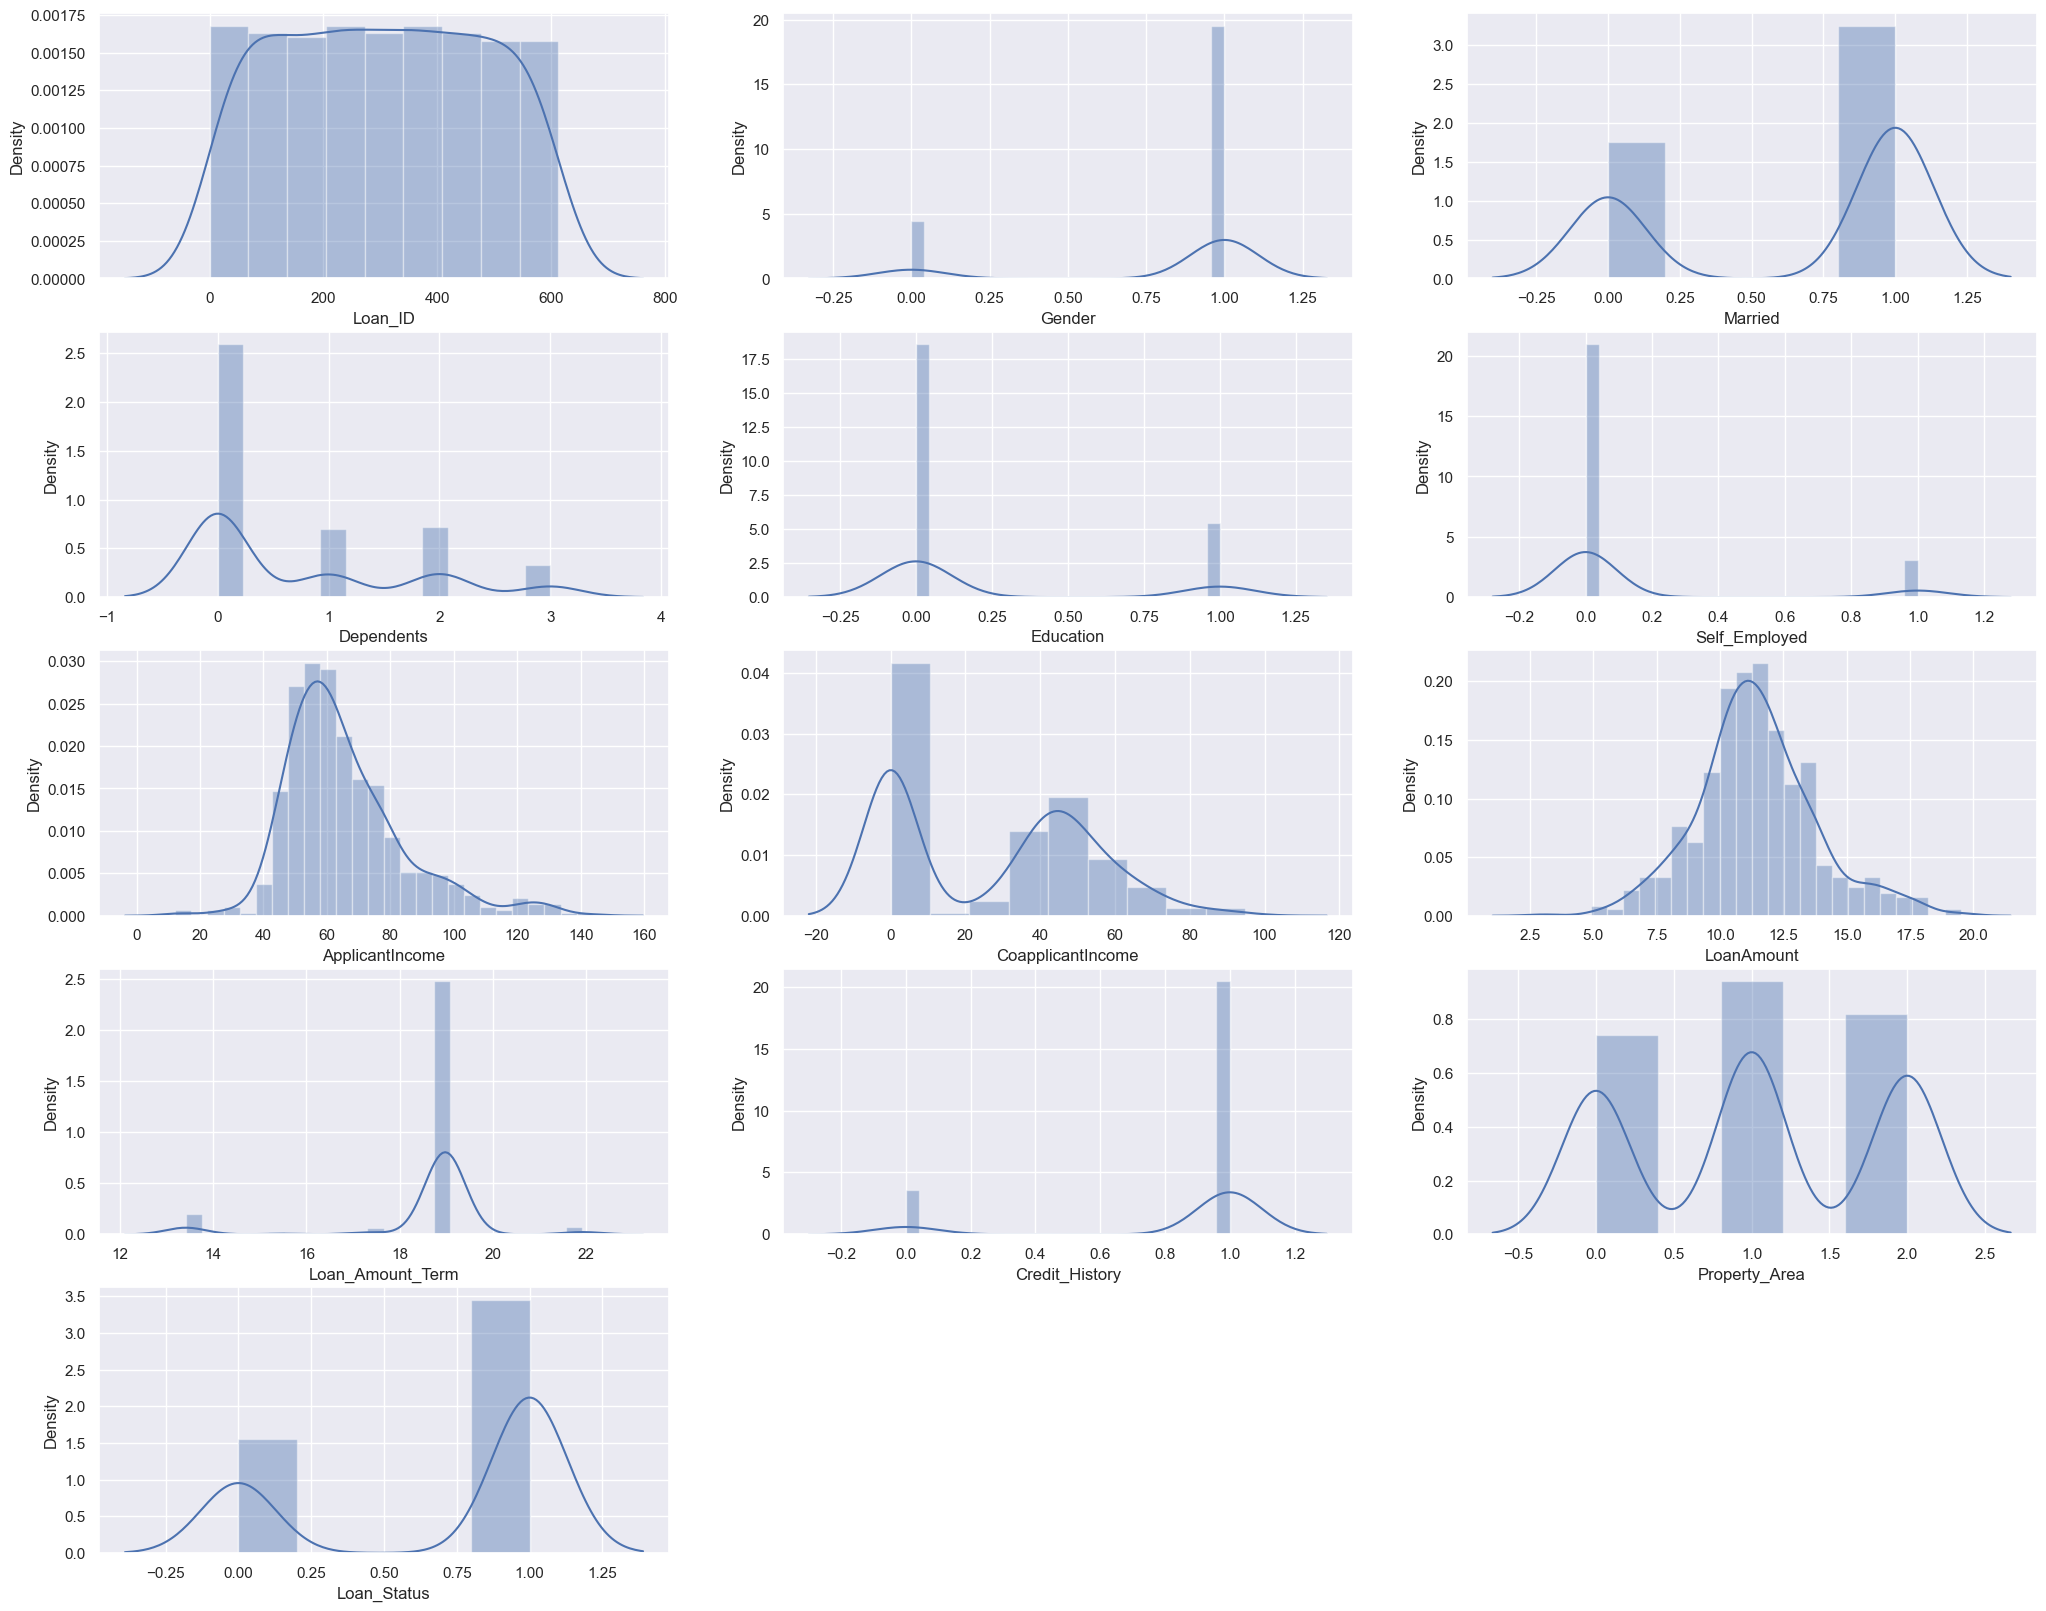

In [48]:
plt.figure(figsize=(25,20))
for i in enumerate(LoanApp_new.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(LoanApp_new[i[1]],color='b')

##### Data Splitting

In [49]:
x=LoanApp_new.drop('Loan_Status',axis=1)
y=LoanApp_new['Loan_Status']

#### Balancing Data using SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
target = SMOTE()
x,y= target.fit_resample(x,y)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

Model Training

In [52]:
Lg=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
gnb=GaussianNB()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier()
knn=KNeighborsClassifier()
etc=ExtraTreesClassifier()

model=(Lg,dtc,gnb,ada,rfc,gb,knn,etc)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of',m,)
    print(accuracy_score(y_test,predict))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))

Accuracy Score of LogisticRegression()
0.8140703517587939
[[79 28]
 [ 9 83]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       107
           1       0.75      0.90      0.82        92

    accuracy                           0.81       199
   macro avg       0.82      0.82      0.81       199
weighted avg       0.83      0.81      0.81       199

Accuracy Score of DecisionTreeClassifier(criterion='entropy')
0.8090452261306532
[[87 20]
 [18 74]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.79      0.80      0.80        92

    accuracy                           0.81       199
   macro avg       0.81      0.81      0.81       199
weighted avg       0.81      0.81      0.81       199

Accuracy Score of GaussianNB()
0.7939698492462312
[[75 32]
 [ 9 83]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79  

HyperParameter Tuning-RandomizedSearchCV

In [53]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt']
}


random_search_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1)


random_search_rfc.fit(x_train, y_train)


best_params = random_search_rfc.best_params_
best_model = random_search_rfc.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of RandomForestClassifier:", accuracy*100)


Accuracy Score of RandomForestClassifier: 85.92964824120602


##### Saving best Model

In [54]:
import pickle
filename = 'Loan_Application_Prediction_best_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [55]:
y_pred=rfc.predict(x_test)
LoanData=pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
LoanData

,Actual,Predicted
692,0,0
779,0,0
63,0,1
532,0,0
66,0,0
...,...,...
296,1,1
90,1,1
695,0,0
181,1,1
